In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

Image-treat-1: sem data augmentation, com normalização e sem equalização

Image-treat-2: com data augmentation, com normalização e sem equalização

Image-treat-3: com data augmentation, com normalização e com equalização

Abordagem 4: com data augmentation, com normalização e com equalização, usando mae pra loss, batch de 128 --> pq eu observei muita alteração da direção do crescimento

Abordagem 5: sem data augmentation, com normalização e sem equalização, usando mae pra loss, batch de 128

In [127]:
activations = ['relu', 'lrelu']
img_treats=['image-treat-1', 'image-treat-2', 'image-treat-3', 'abordagem-4', 'abordagem-5']
nets = ['lenet', 'alexnet']

activation, img_treat, net = activations[0], img_treats[1], nets[1]
activation, img_treat, net

('relu', 'image-treat-2', 'alexnet')

In [128]:
df_hist = pd.read_csv('callbacks/'+net+'/age/consolidados/history-regression-'+img_treat+ '-' + activation + '.csv').rename(
    columns={'epoch': 'Época', 'loss':'RMSE Treino', 'val_loss': 'RMSE Validação', 
             'mean_absolute_error': 'MAE Treino', 'val_mean_absolute_error': 'MAE Validação'})
df_hist['Época']+=1
#df_hist_alex = df_hist[0:6]
#df_hist_lenet = df_hist[6:]

In [129]:
df_hist# = df_hist[16:]#.sort_values(by='MAE Validação')

,Época,RMSE Treino,MAE Treino,RMSE Validação,MAE Validação
0,1,242.798070,12.069838,207.882644,11.726431
1,2,209.283530,11.358175,196.830119,10.954507
2,3,204.233036,11.257353,192.474146,11.001123
3,4,202.579352,11.217272,192.156220,11.038591
4,5,200.882302,11.167564,191.788538,10.790583
5,6,200.023550,11.150653,189.489853,10.730083
6,7,200.047431,11.145981,188.839463,10.708415
7,8,199.481534,11.134520,187.062627,10.703035
8,9,198.162310,11.091241,195.146830,11.087372
9,10,197.603158,11.070355,187.569428,10.956022


In [130]:
df_hist[['RMSE Treino', 'RMSE Validação']] = np.sqrt(df_hist[['RMSE Treino', 'RMSE Validação']])

In [135]:
df_hist = df_hist.round(2)
df_hist.drop(index=[i for i in range(16, 36)], inplace=True)
# df_hist.to_csv('callbacks/'+net+'/age/consolidados/history-regression-'+img_treat+ '-' + activation + '.csv', index=False)

In [136]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("", ["0.5","0.1"])

In [137]:
#df_hist.loc[2:].drop(['MAE Treino', 'MAE Validação'], axis=1)
df_hist.drop(['MAE Treino', 'MAE Validação'], axis=1)

,Época,RMSE Treino,RMSE Validação
0,1,15.58,14.42
1,2,14.47,14.03
2,3,14.29,13.87
3,4,14.23,13.86
4,5,14.17,13.85
5,6,14.14,13.77
6,7,14.14,13.74
7,8,14.12,13.68
8,9,14.08,13.97
9,10,14.06,13.70


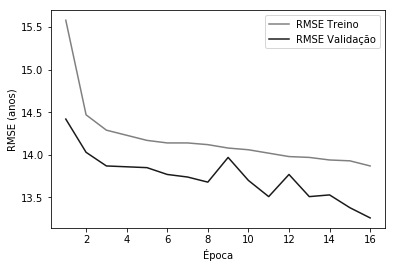

In [138]:
ax1 = df_hist.drop(['MAE Treino', 'MAE Validação'], axis=1).plot(x='Época', colormap=cmap)
ax1.set_ylabel("RMSE (anos)")
ax1.get_figure().savefig('graficos/result-hist/fig-history-' + img_treat+ '-' + net + '-' + activation +'-rmse.png')

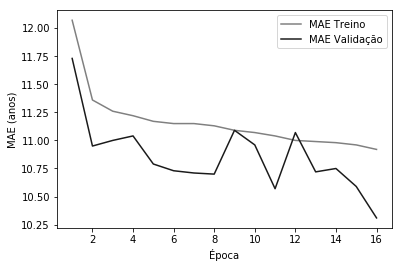

In [139]:
ax1 = df_hist.drop(['RMSE Treino', 'RMSE Validação'], axis=1).plot(x='Época', colormap=cmap)
ax1.set_ylabel("MAE (anos)")
ax1.get_figure().savefig('graficos/result-hist/fig-history-' + img_treat+ '-' + net + '-' + activation +'-mae.png')